# **Jobwise Resume Classification**

**Steps:-**
1. Load Dataset
2. Input-Output data separation
3. Preprocessing the data
4. Cross Validation
5. Build the model
6. Performance Evaluation
7. Predictions


**Dataset**

In [ ]:
#Dataset : UpdatedResumeDataset.csv

**Import the libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

**Import the dataset**

In [4]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [5]:
#shape of data
df.shape

(962, 2)

**Separate the input-output data**

In [6]:
#classification of input and output data
x=df['Resume']
y=df['Category']

In [7]:
#length of strings in every row
x.str.len()

0      4786
1      1268
2      1871
3      6995
4       452
       ... 
957    2130
958    2306
959    3319
960     767
961    1955
Name: Resume, Length: 962, dtype: int64

In [8]:
y.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [9]:
#number of uniques job categories in the data
len(np.unique(y))

25

<Axes: xlabel='count', ylabel='Category'>

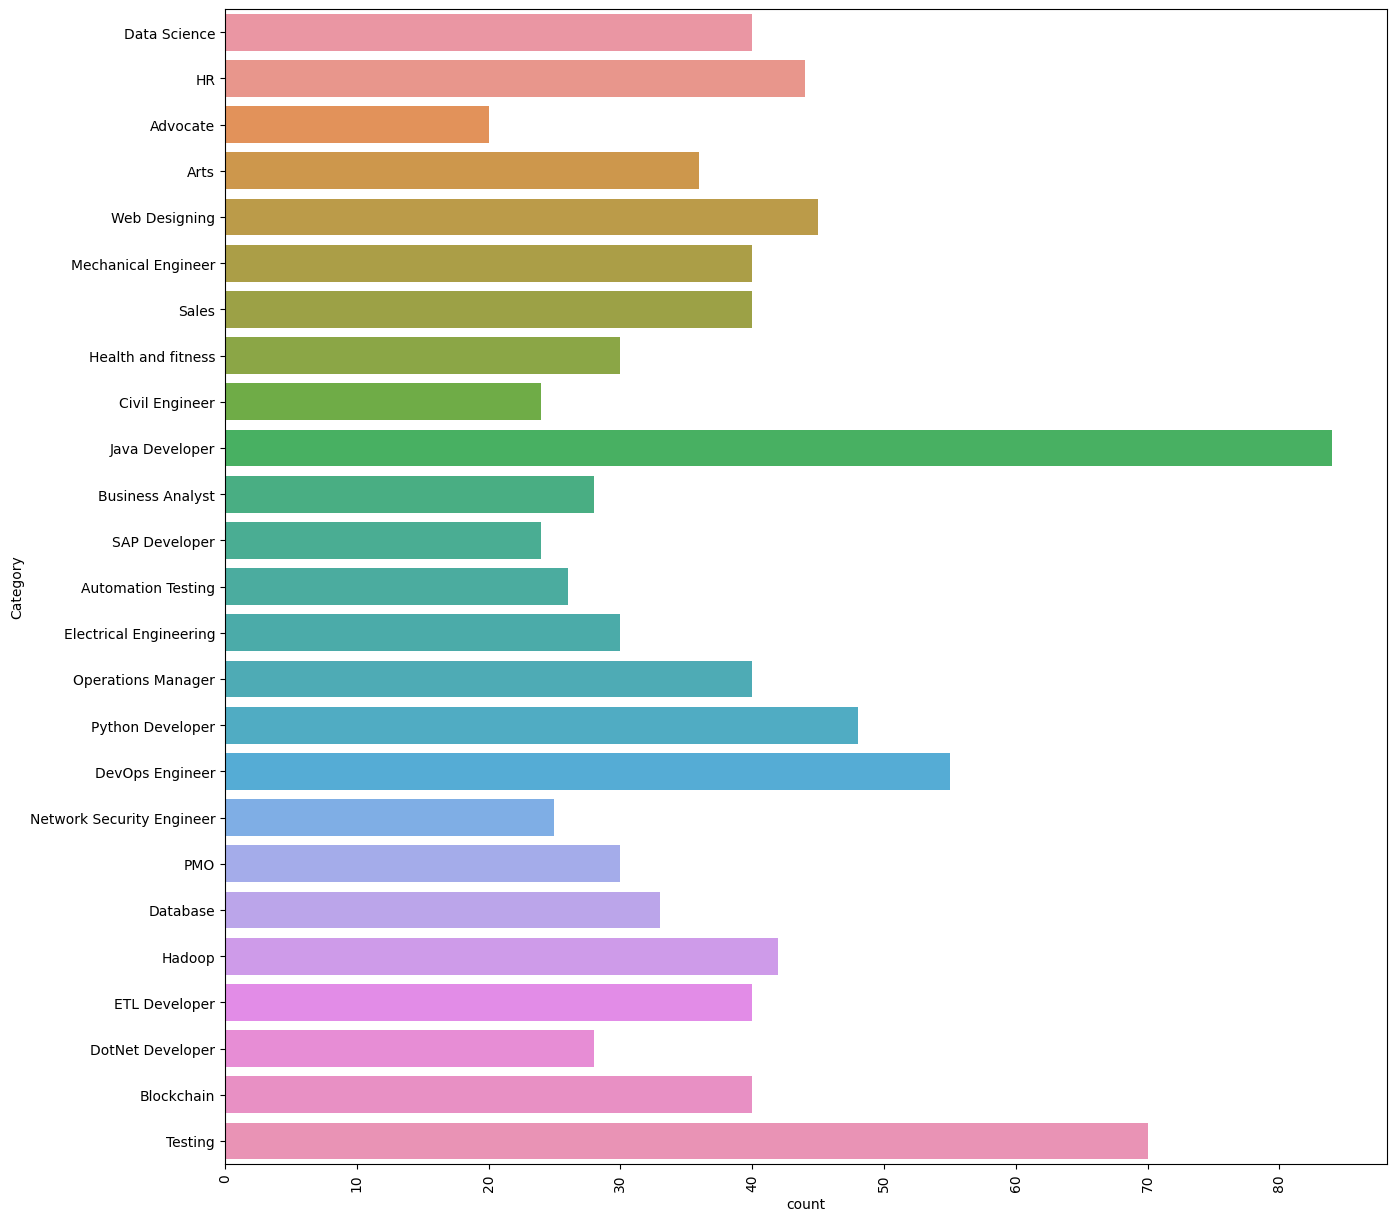

In [10]:
#plot the count of frequencies of categories

import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category',data=df)

<Axes: title={'center': 'CATEGORY DISTRIBUTION'}>

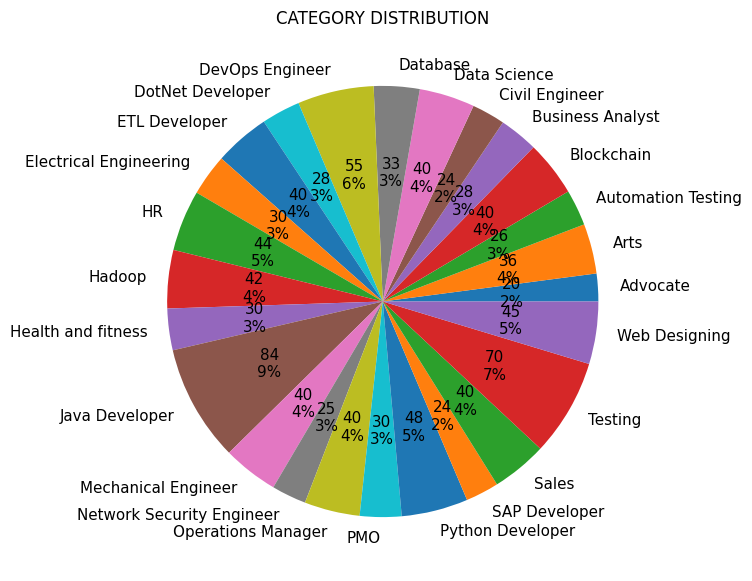

In [15]:
#plot the pie-chart of categories with their count & percents of frequecy.
#EXAMPLE CODE-1

plt.figure(figsize=(7,7))
plt.title("CATEGORY DISTRIBUTION")
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
df.groupby('Category').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10.9})

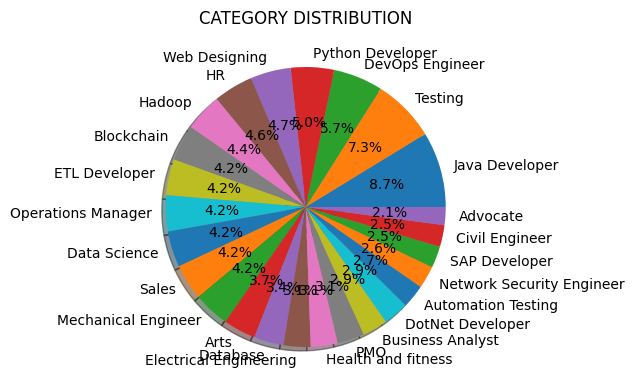

In [12]:
#EXAMPLE CODE-2

from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels = df['Category'].value_counts().index

#MAKE SQUARE FIGURES AND AXES
plt.figure(1, figsize=(10,10))
the_grid = GridSpec(2,2)

# cmap = plt.get_cmap("coolwarm")
# colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1], aspect=1, title="CATEGORY DISTRIBUTION")

source_pie = plt.pie(targetCounts,
                    labels = targetLabels,
                    autopct = '%1.1f%%', shadow=True) # put colors = colors in bracket to plot a different color pie
plt.show()

In [ ]:
print(x[356])

Computer Skills: Languages And Script: JSP, Servlet, HTML, CSS, Java Script, Jquery, Ajax, Spring, Hibernate Operating System: Microsoft WindowsÂ® 2003/XP/Vista/7/8 Databases: My SQL Concepts: OOPS, Core java, Advance java Development Tool: Eclipse, Net beans IDE Web Server: Apache Tomcat 7.0Education Details 
January 2007 H.S.C  Amravati, Maharashtra VidyaBharati college
January 2005 S.S.C  Amravati, Maharashtra Holy Cross English School
Java Developer 

Java Developer - Kunal IT Services Pvt Ltd
Skill Details 
ECLIPSE- Exprience - Less than 1 year months
JAVA- Exprience - 14 months
HIBERNATE- Exprience - Less than 1 year months
SPRING- Exprience - Less than 1 year months
jQuery- Exprience - Less than 1 year monthsCompany Details 
company - Kunal IT Services Pvt Ltd
description - Currently Working As Java Developer In Winsol Solution Pvt Ltd From 1 July 2017 To Till Date.

Experience Of  2 Yrs As A Java Developer In Kunal IT Services Pvt Ltd.


**Cleaning data using Regex**

In [16]:
import re

In [17]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*',' ',resumeText)# remove urls
    resumeText = re.sub('RT|cc',' ',resumeText)# remove RT and CC
    resumeText = re.sub('#\S+','',resumeText) # remove hashtag-s
    resumeText = re.sub('@\S+',' ',resumeText)# remive mentions
    resumeText = re.sub('[%s]' %
                        re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',resumeText)#remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ',resumeText)#remove unicode
    resumeText = re.sub('\s+',' ',resumeText)# remove extra white space
    return resumeText

In [18]:
cleanResume(x[17])

'Education Details B Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than 1 year months Tensorflow Exprience Less than 1 year months Scikit Exprience Less than 1 year months Python Exprience Less than 1 year months GCP Exprience Less than 1 year months Pandas Exprience Less than 1 year months Neural Network Exprience Less than 1 year monthsCompany Details company Wipro description Bhawana Aggarwal E Mail bhawana chd Phone 09876971076 VVersatile high energy professional targeting challenging assignments in Machine PROFILE SUMMARY An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine Learning Deep Learning Data Science Python Software Development Skilled in managing end to end development and software products projects from inception requirement specs planning designing implementation configuration and documentation Knowled

In [32]:
#import nltk libraries

import nltk
from nltk.corpus import stopwords
import string
import wordcloud
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

In [35]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
#get the list of total words from cleaned text
sword = stopwords.words('english')
totalwords = []
Sentences = df['Resume'].values
CleanedSentences = ""
for i in range(0,160):
    cleanedText =cleanResume(Sentences[i])
    CleanedSentences += cleanedText
    requiredWords =nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in sword and word not in string.punctuation:
            totalwords.append(word)

In [37]:
totalwords

['Skills',
 'Programming',
 'Languages',
 'Python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'Sql',
 'Java',
 'JavaScript',
 'JQuery',
 'Machine',
 'learning',
 'Regression',
 'SVM',
 'Na',
 'Bayes',
 'KNN',
 'Random',
 'Forest',
 'Decision',
 'Trees',
 'Boosting',
 'techniques',
 'Cluster',
 'Analysis',
 'Word',
 'Embedding',
 'Sentiment',
 'Analysis',
 'Natural',
 'Language',
 'processing',
 'Dimensionality',
 'reduction',
 'Topic',
 'Modelling',
 'LDA',
 'NMF',
 'PCA',
 'Neural',
 'Nets',
 'Database',
 'Visualizations',
 'Mysql',
 'SqlServer',
 'Cassandra',
 'Hbase',
 'ElasticSearch',
 'D3',
 'js',
 'DC',
 'js',
 'Plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'Tableau',
 'Others',
 'Regular',
 'Expression',
 'HTML',
 'CSS',
 'Angular',
 '6',
 'Logstash',
 'Kafka',
 'Python',
 'Flask',
 'Git',
 'Docker',
 'computer',
 'vision',
 'Open',
 'CV',
 'understanding',
 'Deep',
 'learning',
 'Education',
 'Details',
 'Data',
 'Science',
 'Assurance',
 'Associate',

In [38]:
#Most common words and their frequency count

wordfreqdist = nltk.FreqDist(totalwords)
mostcommon=wordfreqdist.most_common(50)
print(mostcommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


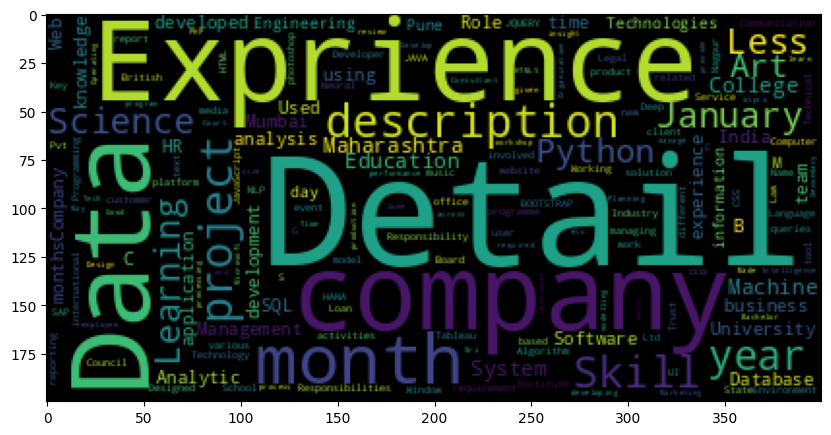

<Figure size 640x480 with 0 Axes>

In [39]:
#WordCloud

wc1 = WordCloud(collocations = False).generate(" ".join(totalwords))
plt.figure(figsize=(10,10))
plt.imshow(wc1)
plt.show()
plt.savefig('wordclod.jpg')

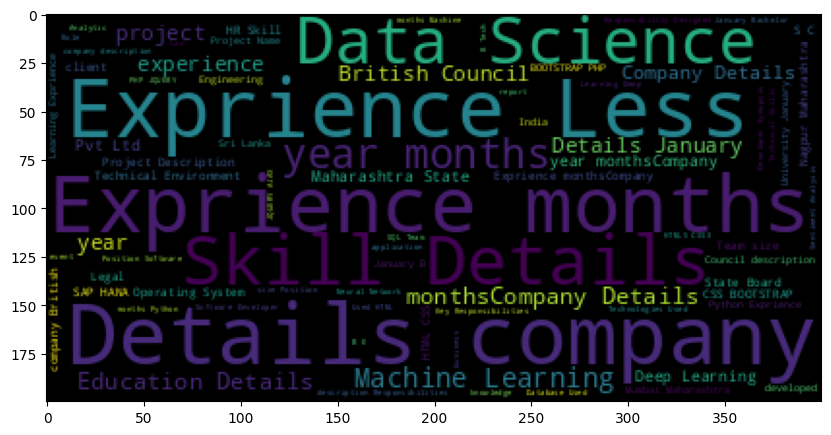

In [40]:
wc = WordCloud().generate(CleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.show()

TF'IDF Vectorize

In [41]:
cleaned = x.apply(lambda a : cleanResume(a))

In [42]:
cleaned

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tfidf = TfidfVectorizer(stop_words='english')

In [45]:
x_vect = tfidf.fit_transform(cleaned)

In [46]:
x_vect.shape

(962, 7351)

**Cross Validation**

In [47]:
#import libraries

from sklearn.model_selection import train_test_split

In [48]:
#train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_vect,y,random_state=0)

In [49]:
x_train.shape

(721, 7351)

In [50]:
x_test.shape

(241, 7351)

**Build the model**

In [51]:
#import libraries

from sklearn.neighbors import NearestCentroid

In [52]:
#build the model

clf = NearestCentroid()

In [53]:
#fit the train data in the model

clf.fit(x_train,y_train)

NearestCentroid()

In [54]:
len(clf.centroids_)

25

**Performance Evaluation**

In [55]:
#predict the test data
y_pred = clf.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,classification_report

In [57]:
# compute accuracy of the model
clf.score(x_test, y_test)

0.9875518672199171

In [58]:
#build the confussion matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0, 

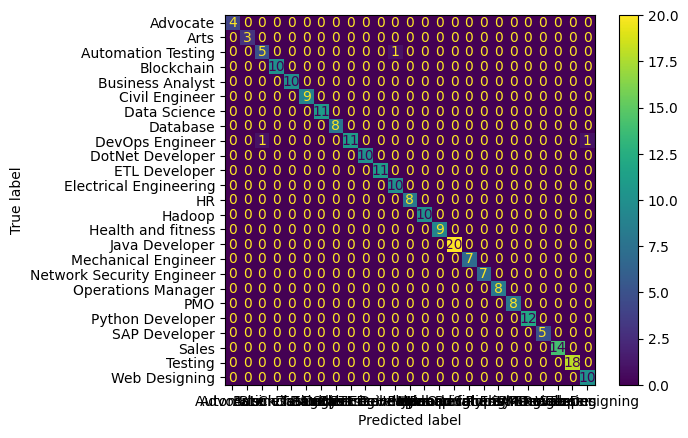

In [59]:
# plot confusion matrix display on predicted data

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [60]:
#print classifier report
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       0.83      0.83      0.83         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00        10
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00        11
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.85      0.92        13
         DotNet Developer       1.00      1.00      1.00        10
            ETL Developer       1.00      1.00      1.00        11
   Electrical Engineering       0.91      1.00      0.95        10
                       HR       1.00      1.00      1.00         8
                   Hadoop       1.00      1.00      1.00     

**Check the prediction on testing data**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


test_df = pd.read_csv("Sample_resume.txt", sep="\t")
test_df

,Tejashree Pishe
0,Jr. Machine Learning Engineer. (MITU Research)
1,EXPERIENCE
2,"MITU Research, New Sangavi, Pune"
3,Feb 2021 till date
4,"Hiko Technology Pvt. Ltd., Baner, Pune Full Ti..."
...,...
81,Dimensionality reduction techniques
82,LANGUAGES
83,"English, Hindi, and Marathi"
84,INTERESTS


In [62]:
test_df= open("Sample_resume.txt")

In [63]:
new = test_df.read()

In [23]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf=TfidfVectorizer()

In [64]:
new = tfidf.transform([new])

In [65]:
#Evaluate the accuracy of model
y_pred = clf.predict(new)
y_pred

array(['Data Science'], dtype=object)

In [66]:
#check the prediction
clf.predict(new)

array(['Data Science'], dtype=object)